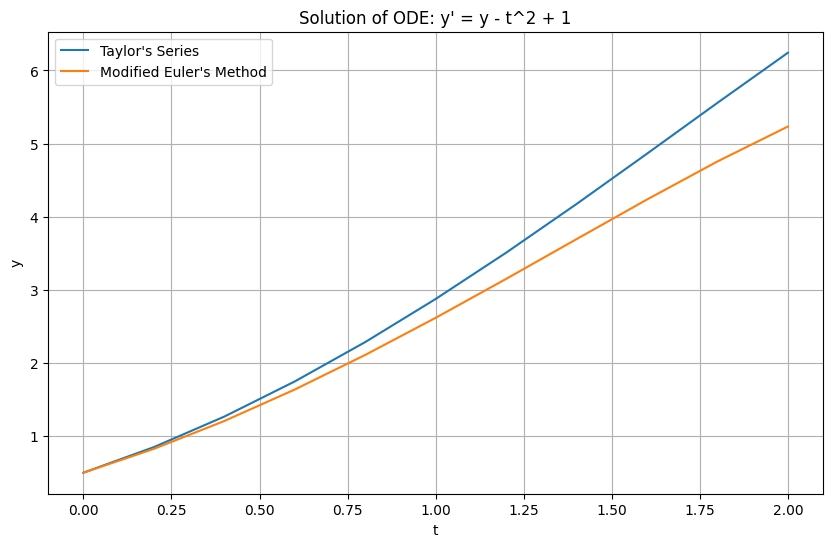

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def taylors_series(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn+h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        y_prime = f(t, y)
        y_double_prime = f(t, y_prime)
        y_values[i] = y + h*y_prime + (h**2 / 2)*y_double_prime
    
    return t_values, y_values

def modified_euler(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn+h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        y_prime = f(t, y)
        y_modified = y + h*y_prime
        y_prime_modified = f(t+h, y_modified)
        y_values[i] = y + (h/2)*(y_prime + y_prime_modified)
    
    return t_values, y_values

# Example ODE: y' = y - t^2 + 1, y(0) = 0.5
def f(t, y):
    return y - t**2 + 1

# Initial conditions
y0 = 0.5
t0 = 0
tn = 2
h = 0.2

# Solve using Taylor's series method
t_values_taylor, y_values_taylor = taylors_series(f, y0, t0, tn, h)

# Solve using Modified Euler's method
t_values_euler, y_values_euler = modified_euler(f, y0, t0, tn, h)

# Plot the solutions
plt.figure(figsize=(10, 6))
plt.plot(t_values_taylor, y_values_taylor, label="Taylor's Series")
plt.plot(t_values_euler, y_values_euler, label="Modified Euler's Method")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of ODE: y\' = y - t^2 + 1')
plt.legend()
plt.grid(True)
plt.show()
